----
## **<font color="crimson"> Ya bien </font>**

In [1]:
pip install jsmetrics

  Using cached xarray-2025.3.1-py3-none-any.whl.metadata (12 kB)
  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached xarray-2025.3.1-py3-none-any.whl (1.3 MB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [9]:
import xarray as xr
import numpy as np
import cftime
import jsmetrics
import jsmetrics.metrics.jet_statistics as jet_statistics
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from matplotlib.ticker import FuncFormatter


In [10]:
# Función para mapear contourf con contour
def contour(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree(),alpha=0.9)
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())
    ax.clabel(cc, cc.levels, inline=True, fontsize=10)
    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [11]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(xlab,fontsize=10)
    plt.ylabel(ylab,fontsize=10)
    plt.title(title,fontsize=11)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)


<a name='title'></a>
 **<font color="Purple"> Funciones </font>**
---

###### 1. Primer paso es subir los archivos 
###### 2. Abrir archivos y seleccionar variables a usar


In [12]:
#Seleccionar archivos del historical
u_filename='datasets/ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [13]:
# Seleccionar variables del archivo historical
u_ds=xr.open_dataset(u_filename)
ua50=u_ds['ua']  #viento zonal

In [19]:
ua = ua50.sel(time=ua50.time.dt.year >= 1979, drop=True)
ua

<xarray.DataArray 'ua' (time: 432, plev: 19, lat: 145, lon: 192)> Size: 914MB
[228510720 values with dtype=float32]
Coordinates:
  * time     (time) object 3kB 1979-01-16 00:00:00 ... 2014-12-16 00:00:00
  * plev     (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  eastward_wind
    long_name:      Eastward Wind
    comment:        Zonal wind (positive in a eastward direction).
    units:          m s-1
    original_name:  mo: (stash: m01s30i201, blev: [1000.0, 925.0, 850.0, 700....
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T11:57:01Z altered by CMOR: replaced missing va...

ERA5

In [20]:
ue5_filename='datasets/sec_trans_ERA5'

In [21]:
u_dsE5=xr.open_dataset(ue5_filename)

In [22]:
u_dsE5

<xarray.Dataset> Size: 75kB
Dimensions:         (pressure_level: 14, latitude: 147, season: 4)
Coordinates:
  * pressure_level  (pressure_level) float64 112B 1e+03 925.0 ... 70.0 50.0
  * latitude        (latitude) float64 1kB 49.5 48.75 48.0 ... -59.25 -60.0
  * season          (season) <U3 48B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    anual           (pressure_level, latitude) float32 8kB ...
    estación        (season, pressure_level, latitude) float32 33kB ...
    OND             (pressure_level, latitude) float32 8kB ...
    NDJ             (pressure_level, latitude) float32 8kB ...
    DJF             (pressure_level, latitude) float32 8kB ...
    JFM             (pressure_level, latitude) float32 8kB ...

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Sección transversal del jet subtropical </i> </h1>
#####   - `Anual`
#####   - `Estacional`
#####   - `Por meses`


In [23]:
def transversal_anual (ua,nivel_A,nivel_B):
    """
    Esta función genera la sección trasnversal del jet entre dos niveles de presión elegidos
    ua: set de datos
    nivel_A: mayor presión 
    nivel_B: menor presión
    """
    sección = ua.sel(plev=slice(nivel_A, nivel_B))
    ua_clima = sección.groupby('time.year').mean(dim=['time','lon']) #checar si no hay problema de hacer los mean al mismo tiempo
    año = ua_clima.mean(dim='year')
    season = sección.groupby('time.season').mean(dim=['time','lon'])
    mensual = sección.groupby('time.month').mean(dim=['time','lon'])
    
    #estos o por estacion
    OND = mensual.sel(month=[10, 11, 12]).mean(dim='month')
    NDJ = mensual.sel(month=[11, 12, 1]).mean(dim='month')
    DJF = mensual.sel(month=[12, 1, 2]).mean(dim='month')
    JFM = mensual.sel(month=[1, 2, 3]).mean(dim='month')

    return {'anual':año,'estación':season,'OND': OND, 'NDJ': NDJ, 'DJF': DJF, 'JFM': JFM} 
#LUEGO TENGO QUE LLAMAR LA FUNCIÓN DE CONTROURF PARA CADA UNO 


In [24]:
transversales = transversal_anual(ua,100000,5000)

In [25]:
anual_trans = transversales['anual']
DJF_trans = transversales['DJF']

In [26]:
def pa_to_hpa(x, pos):
    return f'{int(x/100)}'

In [27]:
anual_trans_l = anual_trans.sel(lat=slice(-50,50))
DJF_trans_l = DJF_trans.sel(lat=slice(-50,50))

In [28]:
anual_trans = u_dsE5.anual
DJF_trans = u_dsE5.DJF

In [29]:
anual_transE5 = anual_trans.sel(latitude=slice(50,-50))
DJF_transE5 = DJF_trans.sel(latitude=slice(50,-50))

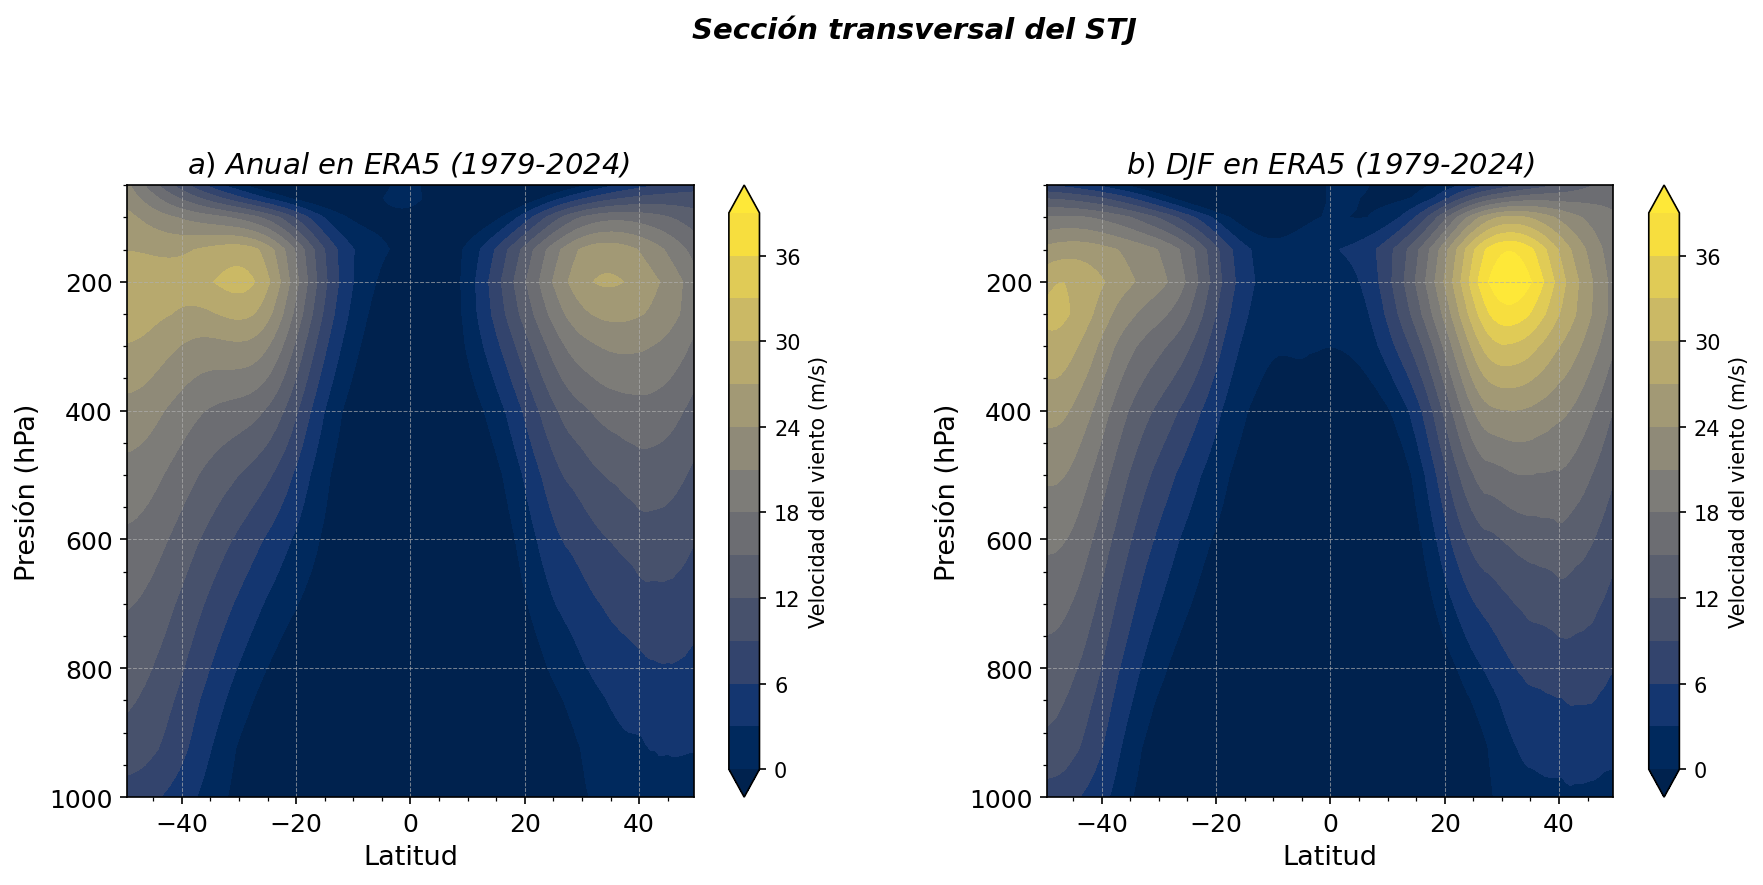

In [30]:
plt.figure(figsize=(14,6),dpi=150)
plt.subplots_adjust(wspace=0.30)

# anual ---------------------------------------------------------------------------------------------------------------------------
plt.subplot(1,2,1)
plt.contourf(anual_transE5.latitude,anual_transE5.pressure_level,anual_transE5,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('a$)$ Anual en ERA5 (1979-2024) ',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

# djf ------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
plt.contourf(DJF_transE5.latitude,DJF_transE5.pressure_level,DJF_transE5,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('b$)$ DJF en ERA5 (1979-2024)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

plt.subplots_adjust(top=.79)
plt.suptitle('Sección transversal del STJ', fontsize=14, color="k", fontstyle='italic', fontweight='bold')
plt.savefig('3_Seccion_transversalERA5.png')


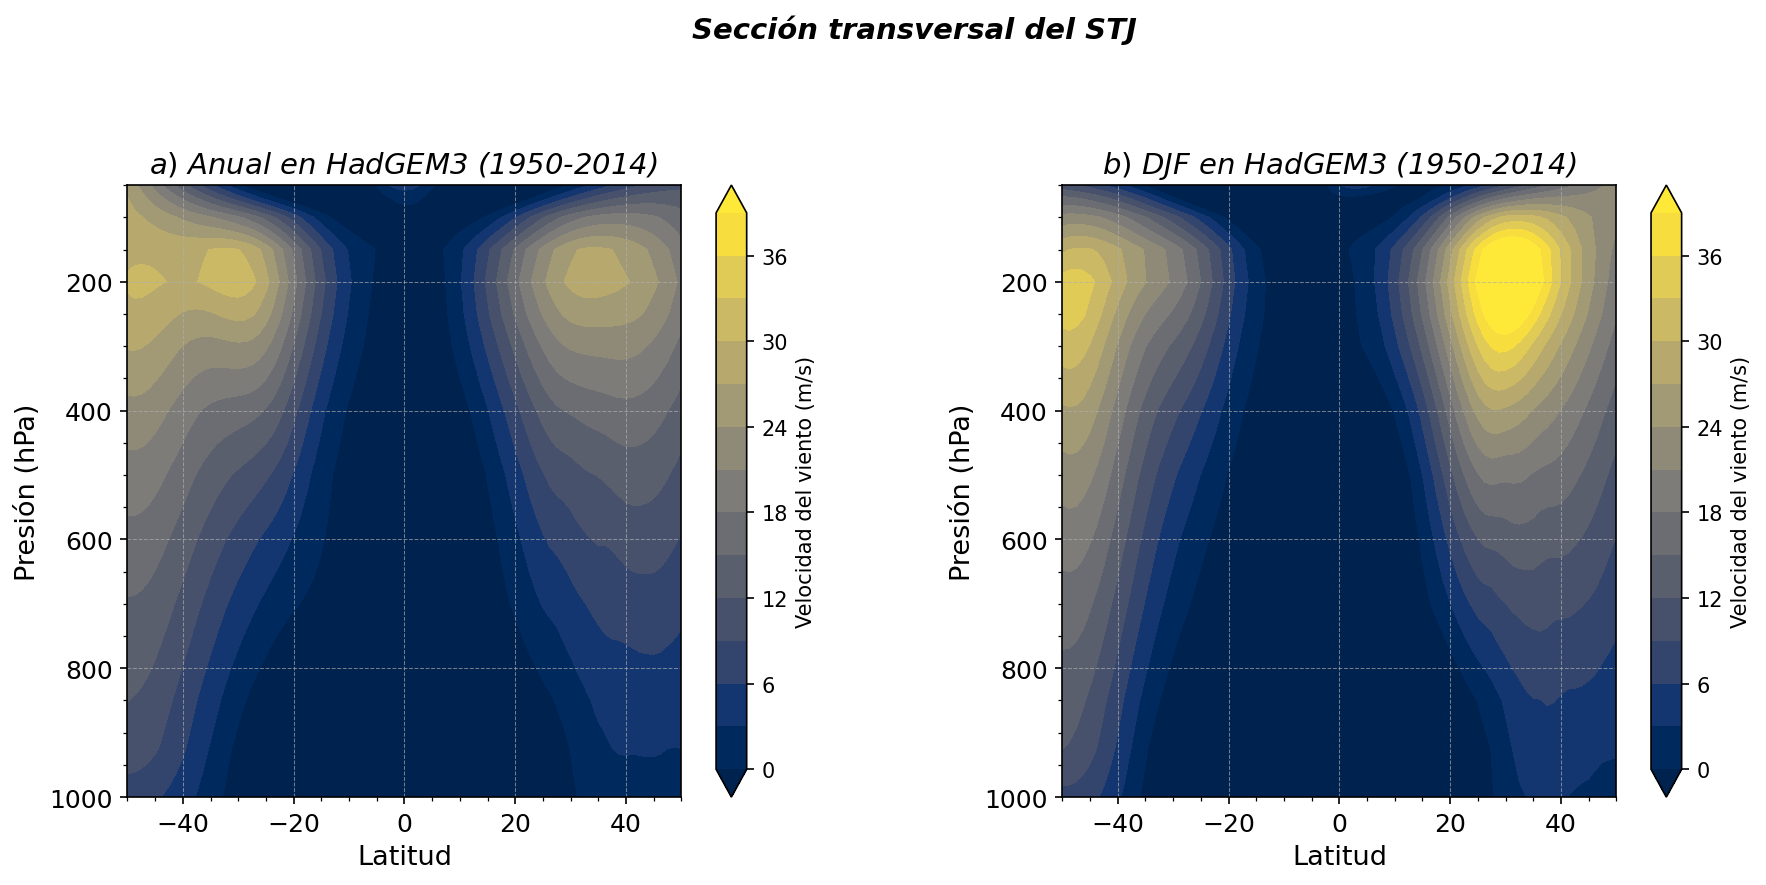

In [31]:
plt.figure(figsize=(14,6),dpi=150)
plt.subplots_adjust(wspace=0.35)

# anual ---------------------------------------------------------------------------------------------------------------------------
plt.subplot(1,2,1)
plt.contourf(anual_trans_l.lat,anual_trans_l.plev,anual_trans_l,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('a$)$ Anual en HadGEM3 (1950-2014) ',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

# djf ------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
plt.contourf(DJF_trans_l.lat,DJF_trans_l.plev,DJF_trans_l,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('b$)$ DJF en HadGEM3 (1950-2014)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

plt.subplots_adjust(top=.79)
plt.suptitle('Sección transversal del STJ', fontsize=14, color="k", fontstyle='italic', fontweight='bold')
plt.savefig('3_Seccion_transversalHG.png')


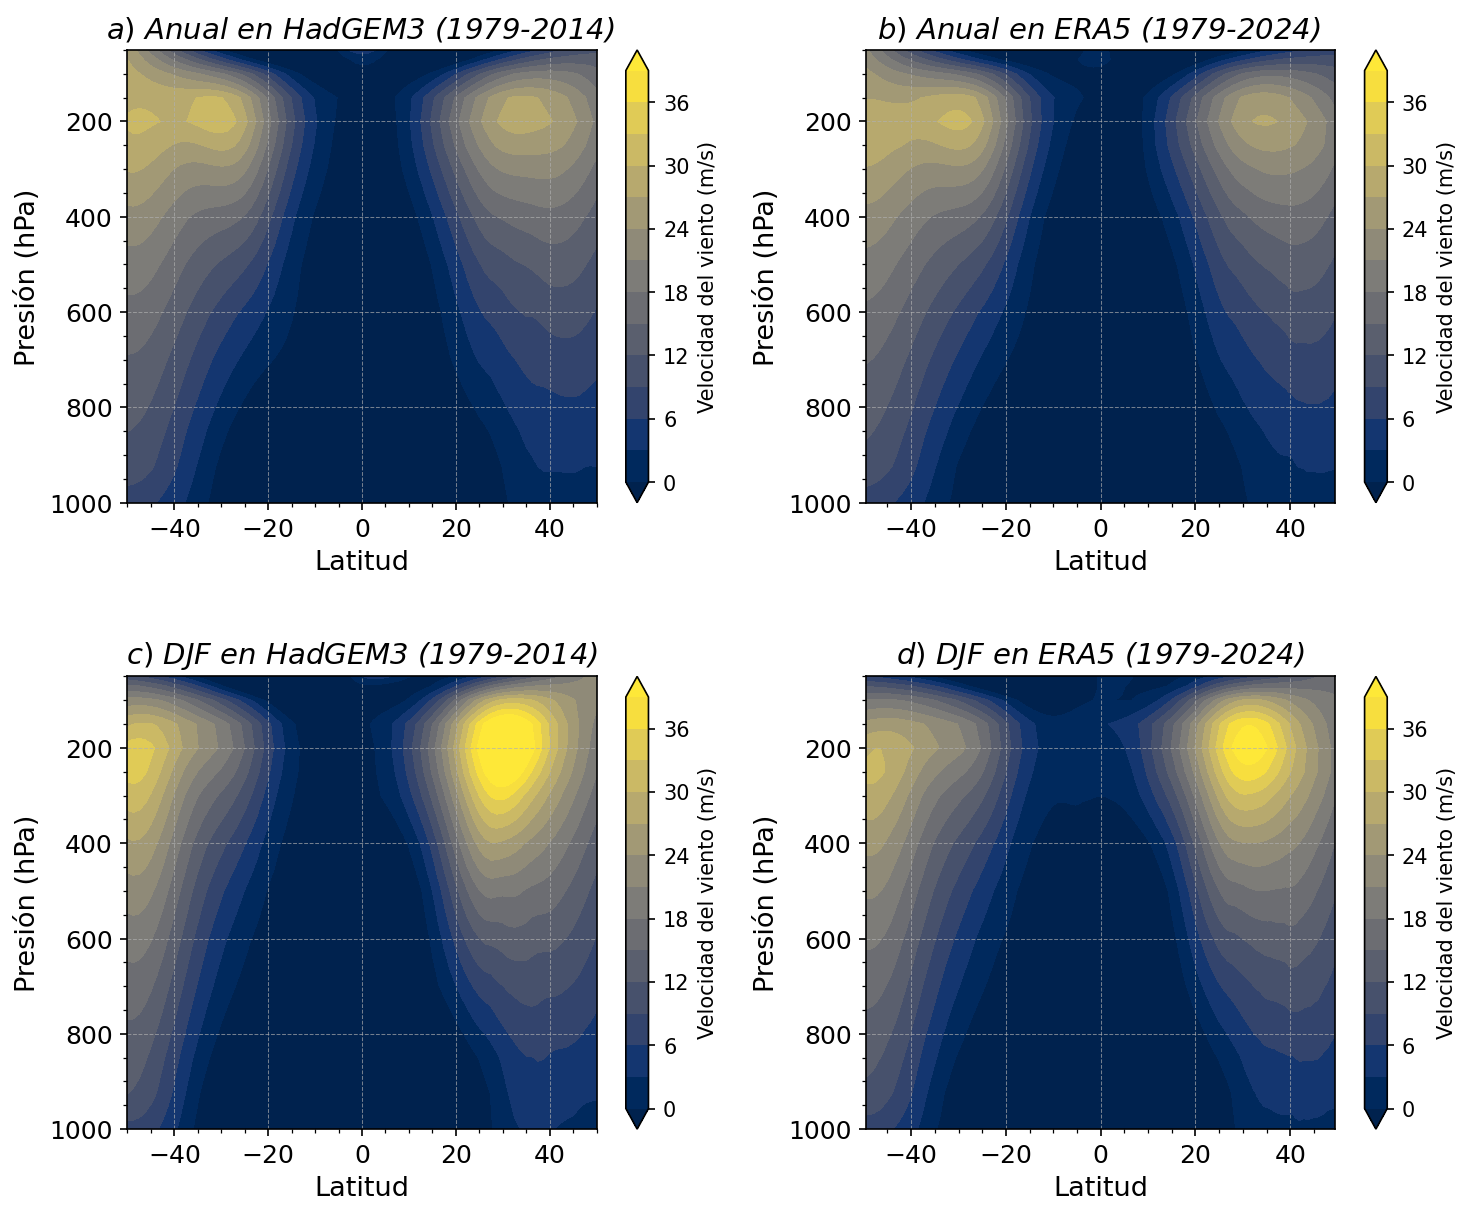

In [32]:
plt.figure(figsize=(10, 9), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# Subplot 1 ANUAL HadGEM
plt.subplot(2, 2, 1)
plt.contourf(anual_trans_l.lat,anual_trans_l.plev,anual_trans_l,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('a$)$ Anual en HadGEM3 (1979-2014) ',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

# Subplot 2 ANUAL ERA5
plt.subplot(2, 2, 2) 
plt.contourf(anual_transE5.latitude,anual_transE5.pressure_level,anual_transE5,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('b$)$ Anual en ERA5 (1979-2024) ',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)

# Subplot 3 DJF JOYA
plt.subplot(2,2,3)
plt.contourf(DJF_trans_l.lat,DJF_trans_l.plev,DJF_trans_l,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('c$)$ DJF en HadGEM3 (1979-2014)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))

# Subplot 4 DJF ERA 5
plt.subplot(2,2,4)
plt.contourf(DJF_transE5.latitude,DJF_transE5.pressure_level,DJF_transE5,levels=np.arange(0,41,3),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('d$)$ DJF en ERA5 (1979-2024)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
# plt.suptitle('Sección transversal del viento zonal',fontsize=14,color="k",fontstyle='italic',fontweight='bold');

plt.savefig('figs/3_Sec_trans_HGE5.png')